In [ ]:
import cvxpy as cp #using python library for convex optimization problem(Solving the convex problem)
import numpy as np
import matplotlib.pyplot as plt #for plotting the graphs
import scipy.io #for loading different types of files(here loading mat file)

# Classification dataset

In [ ]:
mat=scipy.io.loadmat('D:/IIT KGP/semester 2/MLSP LAB/Data_points/Classification_Points_Data1.mat') #loading the mat file
# print(mat)
mat.keys() #finding the keys in mat file
x=mat['A'] #finding the value present at A key
y=mat['B'] #finding the value present at B key

# SVM Primal

In [ ]:
# Define the SVM primal problem
# print(x.shape)
n = x.shape[1]  # number of features (dimensions) of each data point
N = x.shape[0] + y.shape[0]  # total number of data points
X = np.concatenate((x, y), axis=0)  # concatenate the data points of x and y along the row(axis=0) and if (axis=1) then concatenate around the column
print(X.shape)
Y = np.concatenate((np.ones(x.shape[0]), -np.ones(y.shape[0])))  # concatenate the labels into a single vector here axis is not given hence it will flatten the arrays and concatenate
print(Y.shape)
w = cp.Variable(n)  # SVM weight vector of size n*1
print(w.shape)
b = cp.Variable()  # SVM bias term
objective = cp.Minimize(0.5 * cp.norm(w)**2)  # SVM cost function (minimize 0.5*||w||^2)
constraints = [Y[i] * (w.T @ X[i] + b) >= 1 for i in range(N)]  # SVM constraints (points are correctly classified)
problem = cp.Problem(objective, constraints)  # define the SVM problem

# Solve the problem
problem.solve()

# Extract the optimal values
w_opt = w.value  # optimal weight vector
b_opt = b.value  # optimal bias term

(60, 2)
(60,)
(2,)


C:\Users\avnis\anaconda3\Lib\site-packages\cvxpy\reductions\solvers\solving_chain.py:336: FutureWarning: 
    Your problem is being solved with the ECOS solver by default. Starting in 
    CVXPY 1.5.0, Clarabel will be used as the default solver instead. To continue 
    using ECOS, specify the ECOS solver explicitly using the ``solver=cp.ECOS`` 
    argument to the ``problem.solve`` method.
    
  warnings.warn(ECOS_DEPRECATION_MSG, FutureWarning)


# Optimal weights

In [ ]:
#printing the optimal weights and bias value
print("Optimal weights:", w_opt)
print("Optimal bias:", b_opt)

Optimal weights: [-0.92288126  0.76271797]
Optimal bias: 1.197607625558834


# SVM Dual

In [ ]:
import cvxopt
#writing the dual function
def svm_dual(X, y, C=0.01):
    """
    Solves the linear SVM classification problem using the dual formulation.

    Args:
    - X: N x n matrix of input features
    - y: N x 1 vector of labels (-1 or 1)
    - C: scalar regularization parameter

    Returns:
    - w: n x 1 vector of optimal weights
    - b: scalar bias term
    - a: N x 1 vector of Lagrange multipliers
    """
    N, n = X.shape
    K = y.reshape(-1, 1) * X.dot(X.T) * y.reshape(1, -1)
    P = cvxopt.matrix(K)
    q = cvxopt.matrix(-np.ones((N, 1)))
    G = cvxopt.matrix(np.vstack((-np.eye(N), np.eye(N))))
    h = cvxopt.matrix(np.vstack((np.zeros((N, 1)), C * np.ones((N, 1)))))
    A = cvxopt.matrix(y.reshape(1, -1))
    b = cvxopt.matrix(0.0)
    sol = cvxopt.solvers.qp(P, q, G, h, A, b)

    a = np.array(sol['x'])
    w = np.sum(a * y.reshape(-1, 1) * X, axis=0).reshape(-1, 1)
    sv = (a > 1e-4).flatten()
    b = y[sv] - np.dot(X[sv], w)
    b = np.mean(b)

    return w, b, a


# Optimal primal solutions w* and b*

In [ ]:
w, b, a = svm_dual(X, Y, C=0.01)
print("Optimal weights (w):")
print(w)
print("\nBias term (b):")
print(b)
print("\nLagrange multipliers (a):")
print(a)

     pcost       dcost       gap    pres   dres
 0: -5.5147e+00 -9.2973e-01  2e+02  2e+01  4e-14
 1: -1.9476e-01 -9.2179e-01  4e+00  2e-01  3e-14
 2: -1.2180e-01 -5.6966e-01  5e-01  5e-03  1e-15
 3: -1.3801e-01 -1.9457e-01  6e-02  5e-04  2e-15
 4: -1.5951e-01 -1.7102e-01  1e-02  9e-05  2e-15
 5: -1.6353e-01 -1.6669e-01  3e-03  2e-05  2e-15
 6: -1.6497e-01 -1.6522e-01  3e-04  1e-06  2e-15
 7: -1.6509e-01 -1.6509e-01  8e-06  3e-08  2e-15
 8: -1.6509e-01 -1.6509e-01  3e-07  3e-10  2e-15
 9: -1.6509e-01 -1.6509e-01  3e-08  3e-12  2e-15
Optimal solution found.
Optimal weights (w):
[[-0.31324201]
 [ 0.30268376]]

Bias term (b):
0.12949690782443674

Lagrange multipliers (a):
[[1.11014177e-11]
 [1.12849402e-11]
 [9.99999995e-03]
 [9.99999974e-03]
 [9.38033339e-03]
 [9.99999996e-03]
 [9.99999996e-03]
 [3.02195880e-11]
 [2.71588965e-10]
 [7.99679150e-12]
 [9.99999998e-03]
 [1.00082119e-11]
 [1.78920061e-11]
 [9.99999996e-03]
 [6.93976492e-12]
 [9.99999857e-03]
 [9.99999995e-03]
 [4.43336034e-11]

# Data points and Classifier

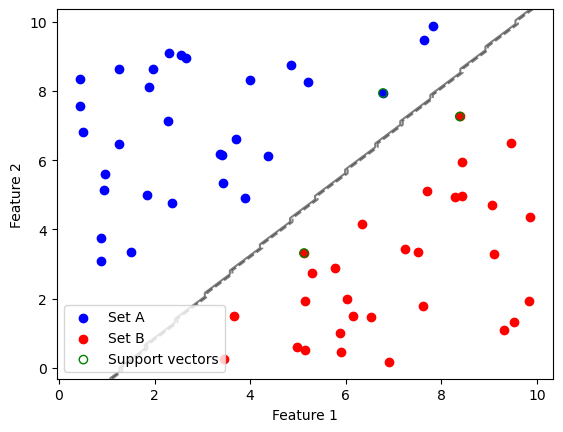

In [ ]:
import matplotlib.pyplot as plt

# Separate the data points into sets A and B
A = X[Y == 1]
B = X[Y == -1]

# Define the SVM classifier function
def svm_classifier(x, w, b):
    return np.sign(x @ w + b)

# Plot the data points and the classifier
fig, ax = plt.subplots()
ax.scatter(A[:, 0], A[:, 1], c='b', label='Set A')
ax.scatter(B[:, 0], B[:, 1], c='r', label='Set B')
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
xlim = ax.get_xlim()
ylim = ax.get_ylim()
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 100), np.linspace(ylim[0], ylim[1], 100))
xy = np.vstack([xx.ravel(), yy.ravel()]).T
Z = svm_classifier(xy, w_opt, b_opt)
Z = Z.reshape(xx.shape)
ax.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5)
svs = np.where(np.abs(Y * (X @ w_opt + b_opt) - 1) < 1e-5)[0]
ax.scatter(X[svs, 0], X[svs, 1], facecolors='none', edgecolors='g', label='Support vectors')
ax.legend()
plt.show()